## **Nama: Welly Oktariana**
## **Machine Learning - 2**

### **1. Data**

Sumber Data : 
https://www.kaggle.com/humansintheloop/semantic-segmentation-of-aerial-imagery


The dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 6 larger tiles.

### **2. objective**

### **3. Exploratory Data Analytic**

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy
import os
import json
import pandas as pd

In [4]:
path_image= r'Semantic segmentation dataset'
for i in os.listdir(path_image):
    path_1 = os.path.join(path_image,i)
    if os.path.isdir(path_1):
        for j in os.listdir(path_1):
                path2=os.path.join(path_1,'images')
                if os.path.isdir(path2):
                    
                    for file in os.listdir(path2):
                        image = cv2.imread(os.path.join(path2,file))
                        if image is not None:
                            print(f'total file in {i}: {len(os.listdir(path2))}, Size image : {image.shape}')
                            break 
                    



total file in Tile 1: 9, Size image : (644, 797, 3)
total file in Tile 1: 9, Size image : (644, 797, 3)
total file in Tile 2: 9, Size image : (544, 509, 3)
total file in Tile 2: 9, Size image : (544, 509, 3)
total file in Tile 3: 9, Size image : (658, 682, 3)
total file in Tile 3: 9, Size image : (658, 682, 3)
total file in Tile 4: 9, Size image : (846, 1099, 3)
total file in Tile 4: 9, Size image : (846, 1099, 3)
total file in Tile 5: 9, Size image : (1058, 1126, 3)
total file in Tile 5: 9, Size image : (1058, 1126, 3)
total file in Tile 6: 9, Size image : (838, 859, 3)
total file in Tile 6: 9, Size image : (838, 859, 3)
total file in Tile 7: 9, Size image : (2061, 1817, 3)
total file in Tile 7: 9, Size image : (2061, 1817, 3)
total file in Tile 8: 9, Size image : (1479, 2149, 3)
total file in Tile 8: 9, Size image : (1479, 2149, 3)


Terdapat 8 folder dengan 9 gambar di dalamnya, setiap folder memiliki ukuran gambar yang berbeda-beda. total gambar adalah 72 gambar. JIka dilihat dari size gambar memiliki ukuran yang berbeda-beda.

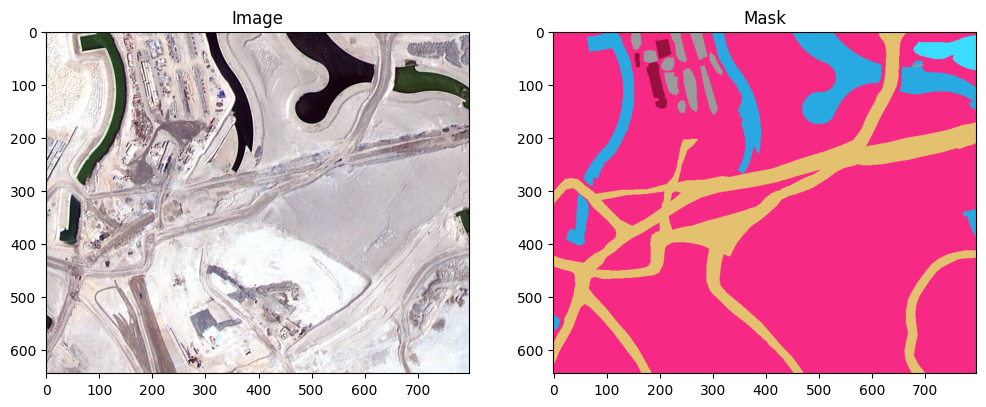

In [5]:
image = cv2.imread('Semantic segmentation dataset\Tile 1\images\image_part_001.jpg')
mask= cv2.imread("Semantic segmentation dataset\Tile 1\masks\image_part_001.png")

fig,axes = plt.subplots(1,2, figsize=(12,6))

axes[0].imshow(image)
axes[0].set_title('Image')

axes[1].imshow(mask)
axes[1].set_title('Mask')

plt.show()

In [6]:
label = open('Semantic segmentation dataset\classes.json')
label = json.load(label)

In [7]:
pd.DataFrame(label['classes'])

title    shape    color geometry_config
0                Water  polygon  #50E3C2              {}
1  Land (unpaved area)  polygon  #F5A623              {}
2                 Road  polygon  #DE597F              {}
3             Building  polygon  #D0021B              {}
4           Vegetation  polygon  #417505              {}
5            Unlabeled  polygon  #9B9B9B              {}

terdapat 6 Label dari data, terdapat polygon water, land, roaad, building, Vegetation, dan unlabeled. Polygon unlabeled ini adalah polygon selain dari 5 lainnnya.

Building: #3C1098
Land (unpaved area): #8429F6
Road: #6EC1E4
Vegetation: #FEDD3A
Water: #E2A929
Unlabeled: #9B9B9B

### **4. Feature Engineering**

Dalam feature engneering ini akan dilakukan preprocessing pada data. Crop Image menjadi ukuran yang lebih kecil, yaitu 256x256, hal ini bertujuan agar lebih detail.


- Tile 1: 797 x 644 --> 768 x 512 --> 6
- Tile 2: 509 x 544 --> 512 x 256 --> 2
- Tile 3: 682 x 658 --> 512 x 512  --> 4
- Tile 4: 1099 x 846 --> 1024 x 768 --> 12
- Tile 5: 1126 x 1058 --> 1024 x 1024 --> 16
- Tile 6: 859 x 838 --> 768 x 768 --> 9
- Tile 7: 1817 x 2061 --> 1792 x 2048 --> 56
- Tile 8: 2149 x 1479 --> 1280 x 2048 --> 40
- Total 9 images in each folder * (145 patches) = 1305

Total 1305 data dengan size 256x 256

In [8]:
from PIL import Image
from patchify import patchify #split image
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [9]:
directory = 'Semantic segmentation dataset'
size_image= 256
scaler= MinMaxScaler()

In [10]:
image_dataset = []
for path, subdir, files in os.walk(directory):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':
        images = os.listdir(path)
        for i, image_name in enumerate(images):
            if image_name.endswith('.jpg'):
                image = cv2.imread(path+"/"+image_name,1)
                size_x =(image.shape[1]//size_image)*size_image
                size_y =(image.shape[0]//size_image)*size_image
                image = Image.fromarray(image)
                image = image.crop((0,0, size_x, size_y))
                image = np.array(image)
                print("path: ",path+"/"+image_name)
                patches_img = patchify(image,(size_image, size_image,3), step = size_image) #step 256 means no overlaps
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        single_patch_img = patches_img[i,j,:,:]
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        single_patch_img = single_patch_img[0]
                        image_dataset.append(single_patch_img)


path:  Semantic segmentation dataset\Tile 1\images/image_part_001.jpg
path:  Semantic segmentation dataset\Tile 1\images/image_part_002.jpg
path:  Semantic segmentation dataset\Tile 1\images/image_part_003.jpg
path:  Semantic segmentation dataset\Tile 1\images/image_part_004.jpg
path:  Semantic segmentation dataset\Tile 1\images/image_part_005.jpg
path:  Semantic segmentation dataset\Tile 1\images/image_part_006.jpg
path:  Semantic segmentation dataset\Tile 1\images/image_part_007.jpg
path:  Semantic segmentation dataset\Tile 1\images/image_part_008.jpg
path:  Semantic segmentation dataset\Tile 1\images/image_part_009.jpg
path:  Semantic segmentation dataset\Tile 2\images/image_part_001.jpg
path:  Semantic segmentation dataset\Tile 2\images/image_part_002.jpg
path:  Semantic segmentation dataset\Tile 2\images/image_part_003.jpg
path:  Semantic segmentation dataset\Tile 2\images/image_part_004.jpg
path:  Semantic segmentation dataset\Tile 2\images/image_part_005.jpg
path:  Semantic segm

In [11]:
mask_dataset = []
for path, subdir, files in os.walk(directory):
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks':
        masks = os.listdir(path)
        for i, mask_name in enumerate(masks):
            if mask_name.endswith('.png'):
                mask = cv2.imread(path+"/"+mask_name,1)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                size_x =(mask.shape[1]//size_image)*size_image
                size_y =(mask.shape[0]//size_image)*size_image
                mask = Image.fromarray(mask)
                mask = mask.crop((0,0, size_x, size_y))
                mask = np.array(mask)

                print("path: ",path+"/"+mask_name)
                patches_mask = patchify(mask,(size_image, size_image,3), step = size_image) #step 256 means no overlaps
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        single_patch_mask = patches_mask[i,j,:,:]
                        # single_patch_mask = scaler.fit_transform(single_patch_mask.reshape(-1, single_patch_mask.shape[-1])).reshape(single_patch_img.shape)
                        single_patch_mask = single_patch_mask[0]
                        mask_dataset.append(single_patch_mask)


path:  Semantic segmentation dataset\Tile 1\masks/image_part_001.png
path:  Semantic segmentation dataset\Tile 1\masks/image_part_002.png
path:  Semantic segmentation dataset\Tile 1\masks/image_part_003.png
path:  Semantic segmentation dataset\Tile 1\masks/image_part_004.png
path:  Semantic segmentation dataset\Tile 1\masks/image_part_005.png
path:  Semantic segmentation dataset\Tile 1\masks/image_part_006.png
path:  Semantic segmentation dataset\Tile 1\masks/image_part_007.png
path:  Semantic segmentation dataset\Tile 1\masks/image_part_008.png
path:  Semantic segmentation dataset\Tile 1\masks/image_part_009.png
path:  Semantic segmentation dataset\Tile 2\masks/image_part_001.png
path:  Semantic segmentation dataset\Tile 2\masks/image_part_002.png
path:  Semantic segmentation dataset\Tile 2\masks/image_part_003.png
path:  Semantic segmentation dataset\Tile 2\masks/image_part_004.png
path:  Semantic segmentation dataset\Tile 2\masks/image_part_005.png
path:  Semantic segmentation datas

In [12]:
image_dataset = np.array(image_dataset)
mask_dataset =  np.array(mask_dataset)

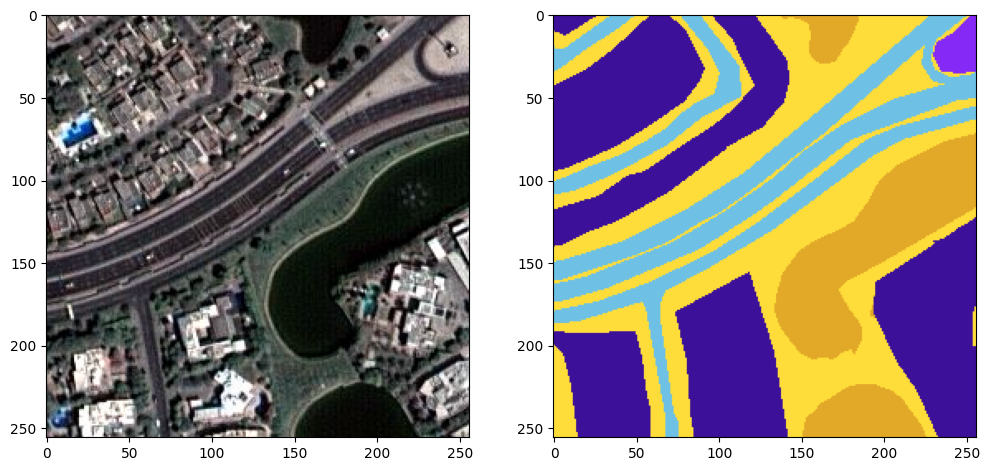

In [13]:
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (size_image, size_image, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (size_image, size_image, 3)))
plt.show()

In [14]:
int('3C', 16)
building = '#3C1098'.lstrip('#')
building = np.array(tuple(int(building[i:i+2],16) for i in(0,2,4)))

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155


In [15]:
label = single_patch_mask

In [16]:
def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format. 
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    
    return label_seg


In [17]:
image_dataset.shape

(1305, 256, 256, 3)

In [18]:
mask_dataset.shape

(1305, 256, 256, 3)

In [19]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)

Unique labels in label dataset are:  [0 1 2 3 4 5]


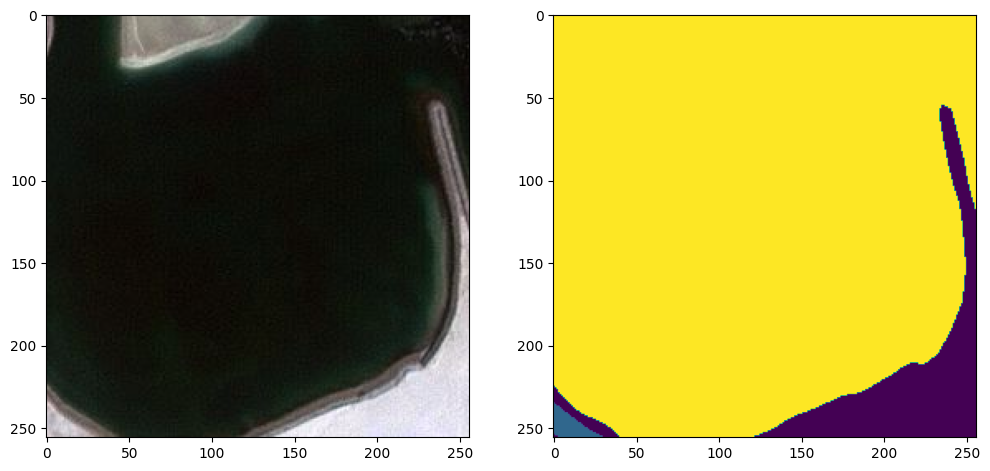

In [20]:
print("Unique labels in label dataset are: ", np.unique(labels))

#Another Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()


## Modeling

In [21]:
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

In [ ]:
n_classes = len(np.unique(labels))
labels_cat = to_categorical(labels, num_classes=n_classes)

X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)


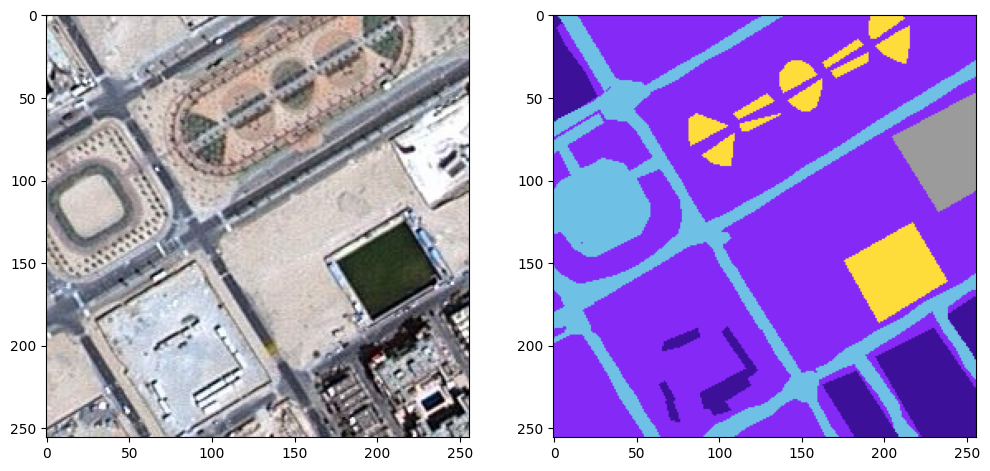

In [ ]:
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (size_image, size_image, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (size_image, size_image, 3)))
plt.show()

In [ ]:
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm

env: SM_FRAMEWORK=tf.keras


In [ ]:
def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    # s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)  # Original 0.1
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model

In [ ]:
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [66]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]


metrics=['accuracy', jacard_coef]

# def get_model():
#     return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

# model = get_model()
# # model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
# model.summary()

In [28]:

history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.5103 - jacard_coef: 0.2596 - loss: 1.2901 - val_accuracy: 0.6436 - val_jacard_coef: 0.3443 - val_loss: 1.0302
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6260 - jacard_coef: 0.3620 - loss: 1.0081 - val_accuracy: 0.6855 - val_jacard_coef: 0.4306 - val_loss: 0.8279
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6795 - jacard_coef: 0.4251 - loss: 0.8678 - val_accuracy: 0.7283 - val_jacard_coef: 0.4475 - val_loss: 0.7650
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7061 - jacard_coef: 0.4442 - loss: 0.8143 - val_accuracy: 0.7543 - val_jacard_coef: 0.4520 - val_loss: 0.7193
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7346 - jacard_coef: 0.4689 - loss: 0.7610 - val_accuracy: 0.7607 - val_jacard_coef: 0.4753 - val_loss: 0.6904
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7490 - jacard_coef: 0.4805 - loss: 0.7346 - val_accura

In [42]:
history_df = pd.DataFrame(history1.history)

history_df

accuracy  jacard_coef      loss  val_accuracy  val_jacard_coef  val_loss
0   0.549826     0.291389  1.188205      0.643592         0.344297  1.030212
1   0.646212     0.382494  0.950255      0.685513         0.430596  0.827928
2   0.687385     0.431420  0.841098      0.728277         0.447494  0.764965
3   0.712273     0.449147  0.796574      0.754262         0.451961  0.719274
4   0.738461     0.470798  0.753487      0.760697         0.475260  0.690416
..       ...          ...       ...           ...              ...       ...
95  0.884908     0.712929  0.334905      0.850841         0.670918  0.480954
96  0.907617     0.765091  0.260676      0.854793         0.695961  0.510638
97  0.914493     0.780020  0.240495      0.859420         0.705778  0.500720
98  0.918524     0.791050  0.225069      0.856268         0.701509  0.510067
99  0.921618     0.797693  0.215709      0.859289         0.709346  0.529030

[100 rows x 6 columns]

In [1]:
name= 'models/satellite_standard_unet_100epochs_19May2024_loss_add.hdf5'
# model.save(name)

In [27]:
history_df = pd.DataFrame(history1.history)
history_df.to_csv('history_model.loss_add.csv')

After 100 epoch training accuracy is 0.92 and val_accuracy is 0.85, The difference between training and accuracy is 7%. The difference accuracy between training and validation still has a large difference. So Next we will carry out hyperparameter tuning. 

## Hyperparameter Tuning



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

def multi_unet_model(n_classes=6, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=3):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs

    # Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    # Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

def build_model(hp):
    model = multi_unet_model()
    model.compile(
        optimizer=Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_dir2',
    project_name='unet_tuning',
    max_consecutive_failed_trials=8
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = build_model(best_hps)
model.summary()




Trial 30 Complete [00h 46m 40s]
val_accuracy: 0.7543466091156006

Best val_accuracy So Far: 0.8409260511398315
Total elapsed time: 13h 42m 55s


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 256, 256,  │        448 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 256, 256,  │          0 │ conv2d_19[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 256, 256,  │      2,320 │ dropout_9[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 128, 128,  │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 128, 128,  │          0 │ conv2d_21[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │      9,248 │ dropout_10[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64, 64,    │          0 │ conv2d_23[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │     36,928 │ dropout_11[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 32, 32,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 32, 32,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 32, 32,    │          0 │ conv2d_25[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 32, 32,    │    147,584 │ dropout_12[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 16, 16,    │          0 │ conv2d_26[0][0] 

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
json.load(open(r'my_dir2\unet_tuning\trial_0017\trial.json'))['metrics']

{'metrics': {'accuracy': {'direction': 'max',
   'observations': [{'value': [0.8209328055381775], 'step': 10}]},
  'loss': {'direction': 'min',
   'observations': [{'value': [0.533671498298645], 'step': 10}]},
  'val_accuracy': {'direction': 'max',
   'observations': [{'value': [0.8409260511398315], 'step': 10}]},
  'val_loss': {'direction': 'min',
   'observations': [{'value': [0.48658034205436707], 'step': 10}]}}}

after doing 29 trial, we get the best accuracy is 0.82 and val_accuracy is 0.84. next we will training model with best parameter.

Training Model with best parameter

In [ ]:
json.load(open(r'my_dir2\unet_tuning\trial_0017\trial.json'))['hyperparameters']['values']

{'learning_rate': 0.0017870280424806136,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0013'}

we will train model with learning_rate = 0.0017870280424806136 and add the number of epoch becomes 100

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

def multi_unet_model(n_classes=6, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=3):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs

    # Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    # Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    return model



In [ ]:
def build_model():
    model = multi_unet_model()
    model.compile(
        optimizer=Adam(learning_rate=0.0017870280424806136),
        loss='categorical_crossentropy',
        metrics=['accuracy',jacard_coef]
    )
    return model

model= build_model()

history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.3946 - jacard_coef: 0.2004 - loss: 1.4730 - val_accuracy: 0.6728 - val_jacard_coef: 0.2798 - val_loss: 1.0553
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 432s 7s/step - accuracy: 0.6601 - jacard_coef: 0.3752 - loss: 0.9608 - val_accuracy: 0.7049 - val_jacard_coef: 0.3876 - val_loss: 0.8540
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 336s 5s/step - accuracy: 0.7076 - jacard_coef: 0.4386 - loss: 0.8255 - val_accuracy: 0.7263 - val_jacard_coef: 0.4252 - val_loss: 0.7691
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7235 - jacard_coef: 0.4510 - loss: 0.7995 - val_accuracy: 0.7313 - val_jacard_coef: 0.4324 - val_loss: 0.7401
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7400 - jacard_coef: 0.4786 - loss: 0.7416 - val_accuracy: 0.7407 - val_jacard_coef: 0.4618 - val_loss: 0.7183
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7590 - jacard_coef: 0.4983 - loss: 0.7014 - val_accura

after doing training with best parameters, we get the accuracy is 0.88 and the val_accuracy is 0.85. The difference between accuracy is 3%, This is better than the result of training before.

### **6. Lakukan evaluasi terhadap model yang sudah kamu buat sebelumnya (metrics, visualisasi, analisis error)**
- metrics: accuracy, F1 score, recall, rmse, mse, maps
- visualisasi loss dan accuracy selama training 
- visualisasi: membandingkan antara actual vs prediction
- analisa error: 90% akurat, 10% error. 5 instance benar, 5 instance salah. 


#### **6.A. Base Model**

In [ ]:
from keras.models import load_model
from keras.metrics import Recall, Precision

- **Metrics accuracy**

In [ ]:
import tensorflow as tf
from keras.models import load_model
from keras.metrics import MeanIoU

name = 'models/satellite_standard_unet_100epochs_18May2024.hdf5'
model = load_model(name,
                   custom_objects={'dice_loss_plus_2focal_loss': 'categorical_crossentropy',
                                   'jacard_coef': jacard_coef})

# Predict the labels for the test data
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=3)
y_test_argmax = np.argmax(y_test, axis=3)

# Using built-in Keras function for IoU
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
iou_score = IOU_keras.result().numpy()


# Evaluate the model on the test data
metrics = model.evaluate(X_test, y_test, verbose=1)
loss = metrics[0]
accuracy = metrics[1]

# Calculate F1 score and recall
precision = Precision()
precision.update_state(y_test_argmax.flatten(), y_pred_argmax.flatten())
precision_result = precision.result().numpy()

recall = Recall()
recall.update_state(y_test_argmax.flatten(), y_pred_argmax.flatten())
recall_result = recall.result().numpy()

f1_score = 2 * (precision_result * recall_result) / (precision_result + recall_result)

print("Mean IoU =", iou_score)
print("Loss:", loss)
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Recall:", recall_result)


9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8640 - jacard_coef: 0.7217 - loss: 0.5280
Mean IoU = 0.5978927
Loss: 0.5290303826332092
Accuracy: 0.8592885136604309
F1 Score: 0.9707892044874162
Recall: 0.9842246


- **Visualisasi accuracy dan loss**

In [ ]:
history_training

Unnamed: 0  accuracy  jacard_coef      loss  val_accuracy  \
0            0  0.549826     0.291389  1.188205      0.643592   
1            1  0.646212     0.382494  0.950255      0.685513   
2            2  0.687385     0.431420  0.841098      0.728277   
3            3  0.712273     0.449147  0.796574      0.754262   
4            4  0.738461     0.470798  0.753487      0.760697   
..         ...       ...          ...       ...           ...   
95          95  0.884908     0.712929  0.334905      0.850841   
96          96  0.907617     0.765091  0.260676      0.854793   
97          97  0.914493     0.780020  0.240495      0.859420   
98          98  0.918524     0.791050  0.225069      0.856268   
99          99  0.921618     0.797693  0.215709      0.859289   

    val_jacard_coef  val_loss  
0          0.344297  1.030212  
1          0.430596  0.827928  
2          0.447494  0.764965  
3          0.451961  0.719274  
4          0.475260  0.690416  
..              ...       ...  
95         0.670918  0.480954  
96         0.695961  0.510638  
97         0.705778  0.500720  
98         0.701509  0.510067  
99         0.709346  0.529030  

[100 rows x 7 columns]

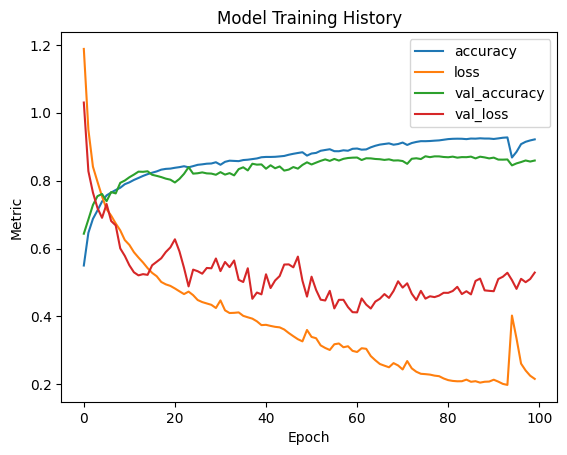

In [ ]:
history_training[['accuracy','loss','val_accuracy','val_loss']].plot()
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.show()

Dilihat dari graphic, accurcay training dan accuracy validation dari epoch 20 sampai ecpoh 100 cenderung memiliki selisih yang cukup tinggi. Sedangkan loss pada data training semakin kecil saat epoch makin tinggi, sedangkan loss validation cenderung tidak menurun meski epoch semakin tinggi.

- **Visualisasi hasil prediksi**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


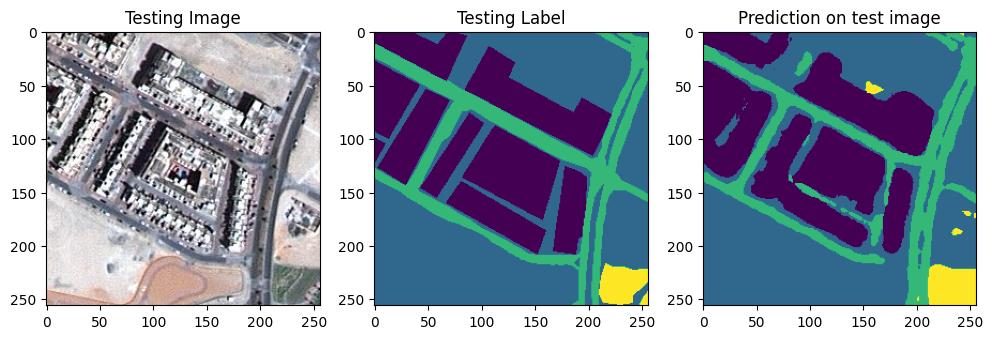

In [ ]:

import random
test_img_number = random.randint(0, len(X_test)) #109
test_img = X_test[test_img_number]
ground_truth=y_test_argmax[test_img_number]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()

Hasil prediction cukup oke, model mampu memprediksi polygon yang cukup mirip.

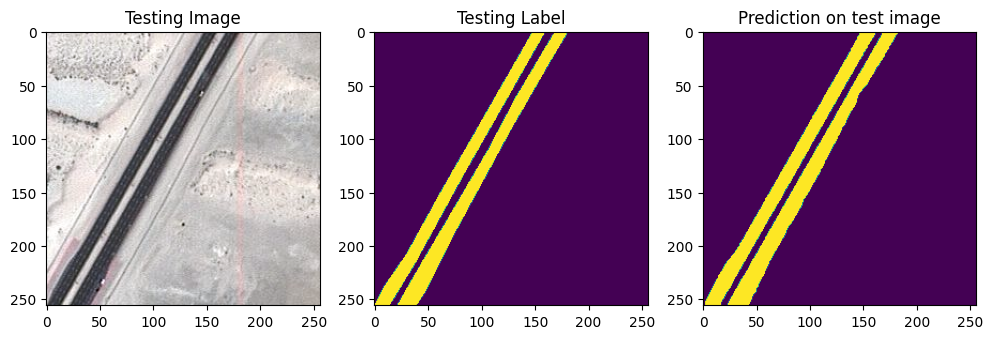

In [57]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()

- **5 instance benar 5 instance salah**

- visualisasi hasil prediksi dengan nilai IoU yang tinggi(mendekati benar)

In [ ]:
iou_scores = []

# Iterate over each image in X_test
for i in range(len(X_test)):
    # Predict segmentation mask for the image
    img = X_test[i]
    y_true = y_test_argmax[i]  # Access ground truth mask
    
    test_img_input = np.expand_dims(img, 0)
    prediction = model.predict(test_img_input)
    predicted_img = np.argmax(prediction, axis=3)[0, :, :]
    
    
    # Compute IoU
    intersection = np.logical_and(predicted_img, y_true)
    union = np.logical_or(predicted_img, y_true)
    iou = np.sum(intersection) / np.sum(union)
    dict = {'idx':i,'image':img,'iou':iou,'y_true':y_true,'y_pred':predicted_img}
    
    # Append IoU score to the list
    iou_scores.append(dict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:

predict_df= pd.DataFrame(iou_scores)
iou_above_5= predict_df[(predict_df['iou'] >0.96 ) & (predict_df['iou'] < 1)]
iou_bellow_5 = predict_df.nsmallest(5,'iou')

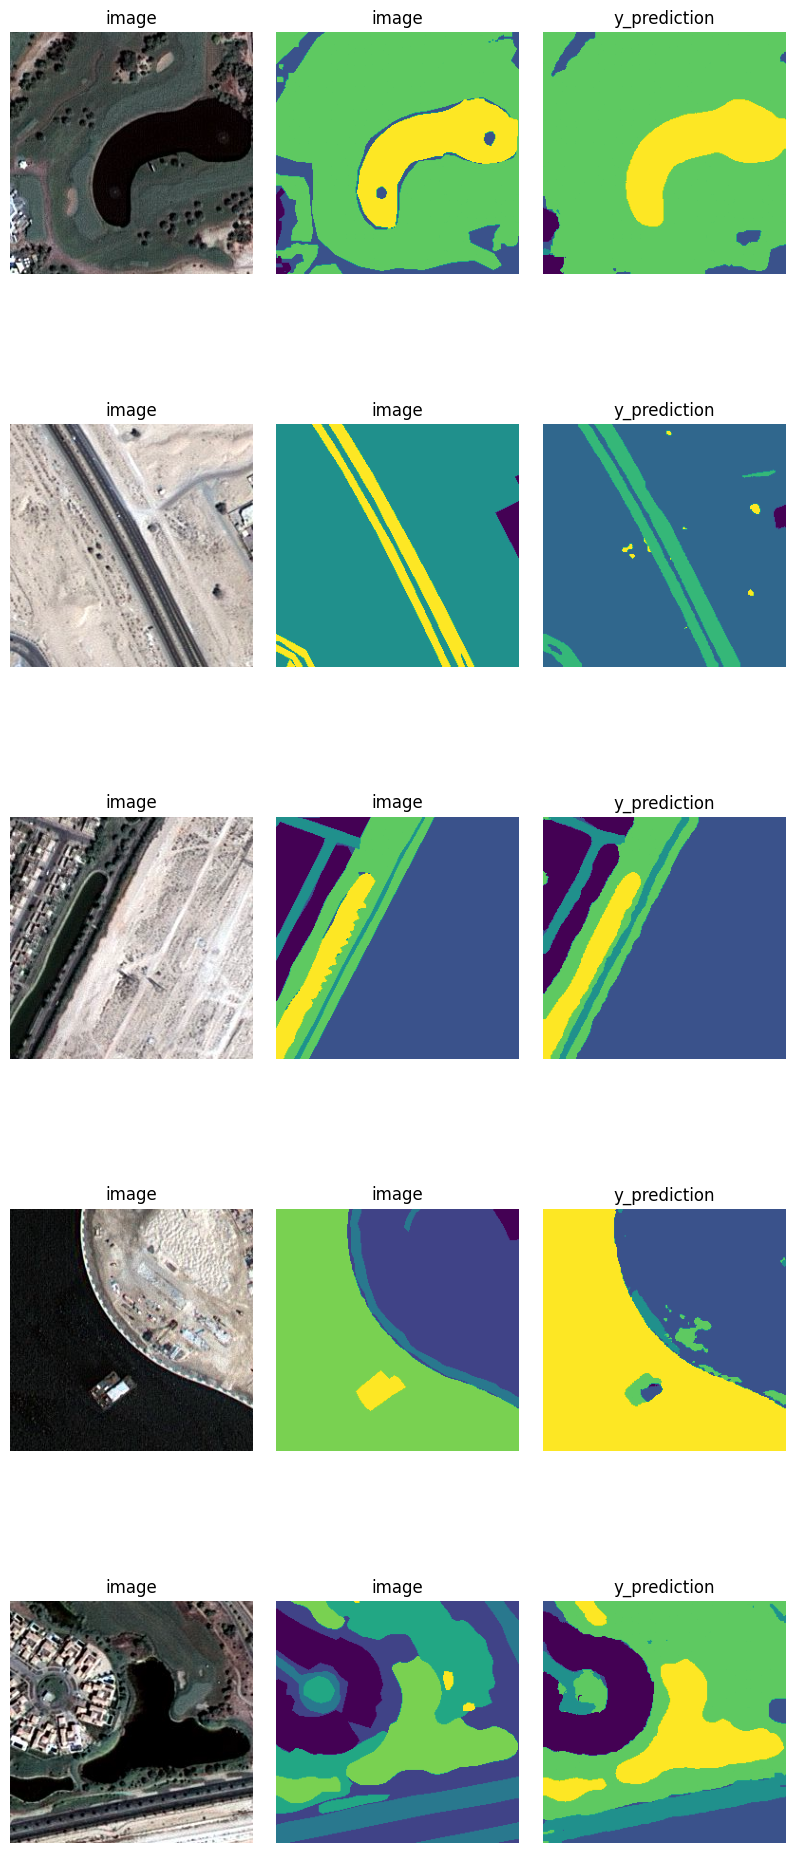

In [ ]:
num_examples = 5
fig, axes = plt.subplots(num_examples, 3, figsize=(10, 5 * num_examples))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

for i in range(num_examples):
    axes[i, 0].imshow(iou_above_5['image'].iloc[i])
    axes[i, 0].set_title('image')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(iou_above_5['y_true'].iloc[i])
    axes[i, 1].set_title('image')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(iou_above_5['y_pred'].iloc[i])
    axes[i, 2].set_title('y_prediction')
    axes[i, 2].axis('off')


- visualisasi hasil prediksi dengan nilai IoU yang rendah

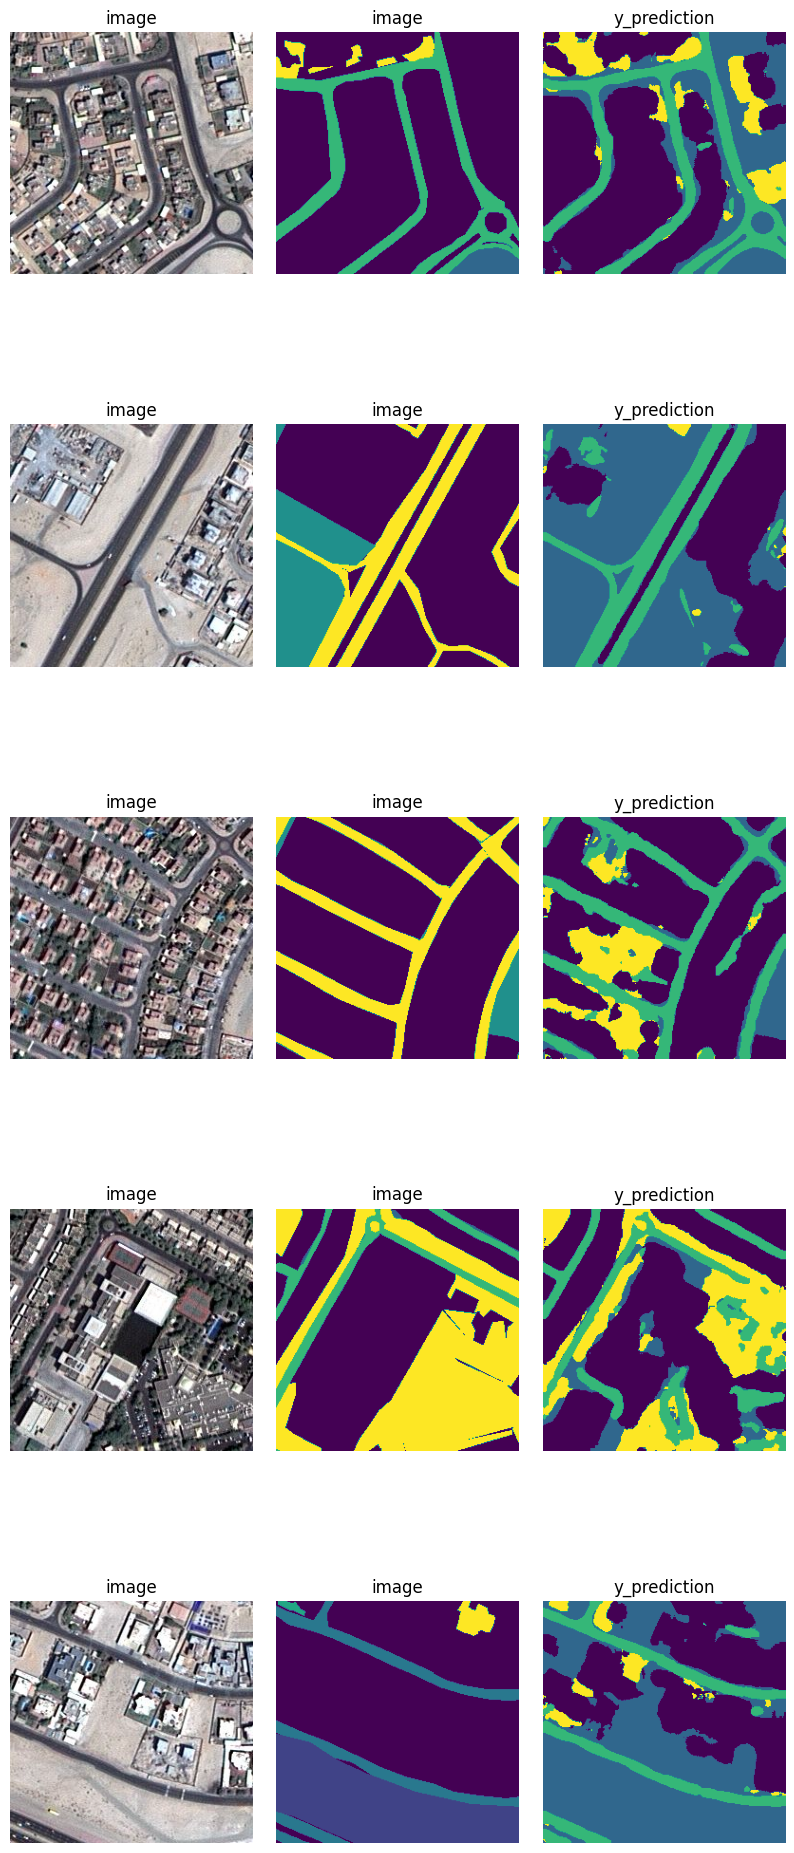

In [ ]:
num_examples = 5
fig, axes = plt.subplots(num_examples, 3, figsize=(10, 5 * num_examples))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

for i in range(num_examples):
    axes[i, 0].imshow(iou_bellow_5['image'].iloc[i])
    axes[i, 0].set_title('image')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(iou_bellow_5['y_true'].iloc[i])
    axes[i, 1].set_title('image')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(iou_bellow_5['y_pred'].iloc[i])
    axes[i, 2].set_title('y_prediction')
    axes[i, 2].axis('off')


#### **6.B Model hyperparameter**

- **Metric Accuracy**

In [ ]:
import tensorflow as tf
from keras.models import load_model
from keras.metrics import MeanIoU

name = r'D:\belajar\final project\models\satellite_standard_unet_100epochs_22May2024.hdf5'
model = load_model(name,
                   custom_objects={'dice_loss_plus_2focal_loss': 'categorical_crossentropy',
                                   'jacard_coef': jacard_coef})

# Predict the labels for the test data
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=3)
y_test_argmax = np.argmax(y_test, axis=3)

# Using built-in Keras function for IoU
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
iou_score = IOU_keras.result().numpy()


# Evaluate the model on the test data
metrics = model.evaluate(X_test, y_test, verbose=1)
loss = metrics[0]
accuracy = metrics[1]

# Calculate F1 score and recall
precision = Precision()
precision.update_state(y_test_argmax.flatten(), y_pred_argmax.flatten())
precision_result = precision.result().numpy()

recall = Recall()
recall.update_state(y_test_argmax.flatten(), y_pred_argmax.flatten())
recall_result = recall.result().numpy()

f1_score = 2 * (precision_result * recall_result) / (precision_result + recall_result)

print("Mean IoU =", iou_score)
print("Loss:", loss)
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Recall:", recall_result)


9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8431 - jacard_coef: 0.6453 - loss: 0.4711
Mean IoU = 0.5593333
Loss: 0.48863890767097473
Accuracy: 0.8376047015190125
F1 Score: 0.959109744937408
Recall: 0.9539795


Accuracy training dan validation cukup baik karna memiliki selisiah 3%, namun mean IoU menjadi lebih kecil dibandingkan base model. Base model IoU 0.59, sedangkan model hyperparameter 0.55.

- **Visualisasi accuracy dan loss**

In [ ]:
history_df=pd.read_excel(r'history_model_hyperparameter.xlsx')

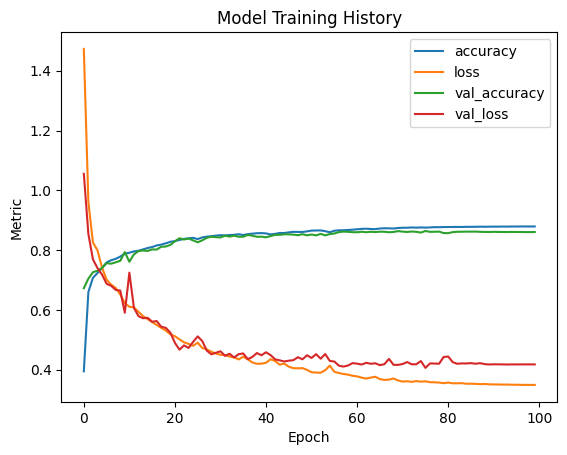

In [ ]:
history_df[['accuracy','loss','val_accuracy','val_loss']].plot()
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.show()

dilihat dari graphic, accuracy training dan testing cenderung konsisten mulai dari epoch 25. Loss training dan loss validation, loss training semakin mengecil ketika epoch makin tinggi sedangkan loss validation cenderung stuck nan mulai dari epoch 40.

- **visualisasi hasil prediksi**

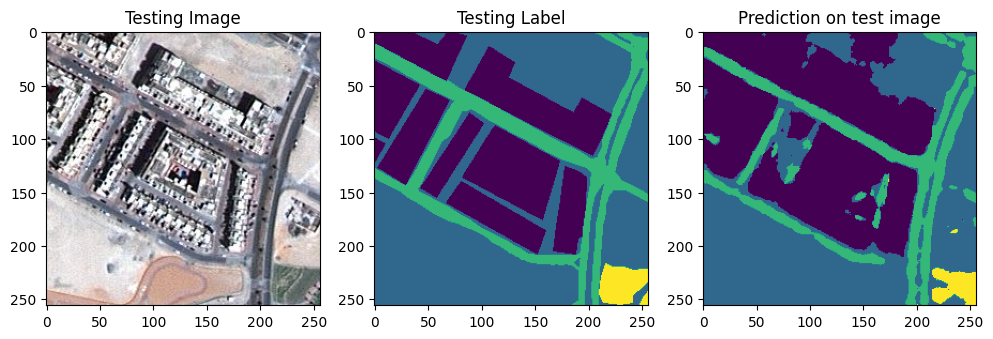

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()

- **5 instance benar 5 instance salah**

- visualisasi 5 instance yang memiliki IoU yang tinggi(mendekati benar)

In [ ]:
iou_scores = []

# Iterate over each image in X_test
for i in range(len(X_test)):
    # Predict segmentation mask for the image
    img = X_test[i]
    y_true = y_test_argmax[i]  # Access ground truth mask
    
    test_img_input = np.expand_dims(img, 0)
    prediction = model.predict(test_img_input)
    predicted_img = np.argmax(prediction, axis=3)[0, :, :]
    
    
    # Compute IoU
    intersection = np.logical_and(predicted_img, y_true)
    union = np.logical_or(predicted_img, y_true)
    iou = np.sum(intersection) / np.sum(union)
    dict = {'idx':i,'image':img,'iou':iou,'y_true':y_true,'y_pred':predicted_img}
    
    # Append IoU score to the list
    iou_scores.append(dict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━

In [ ]:

predict_df= pd.DataFrame(iou_scores)
iou_above_5= predict_df[(predict_df['iou'] >0.96 ) & (predict_df['iou'] < 1)]
iou_bellow_5 = predict_df.nsmallest(5,'iou')

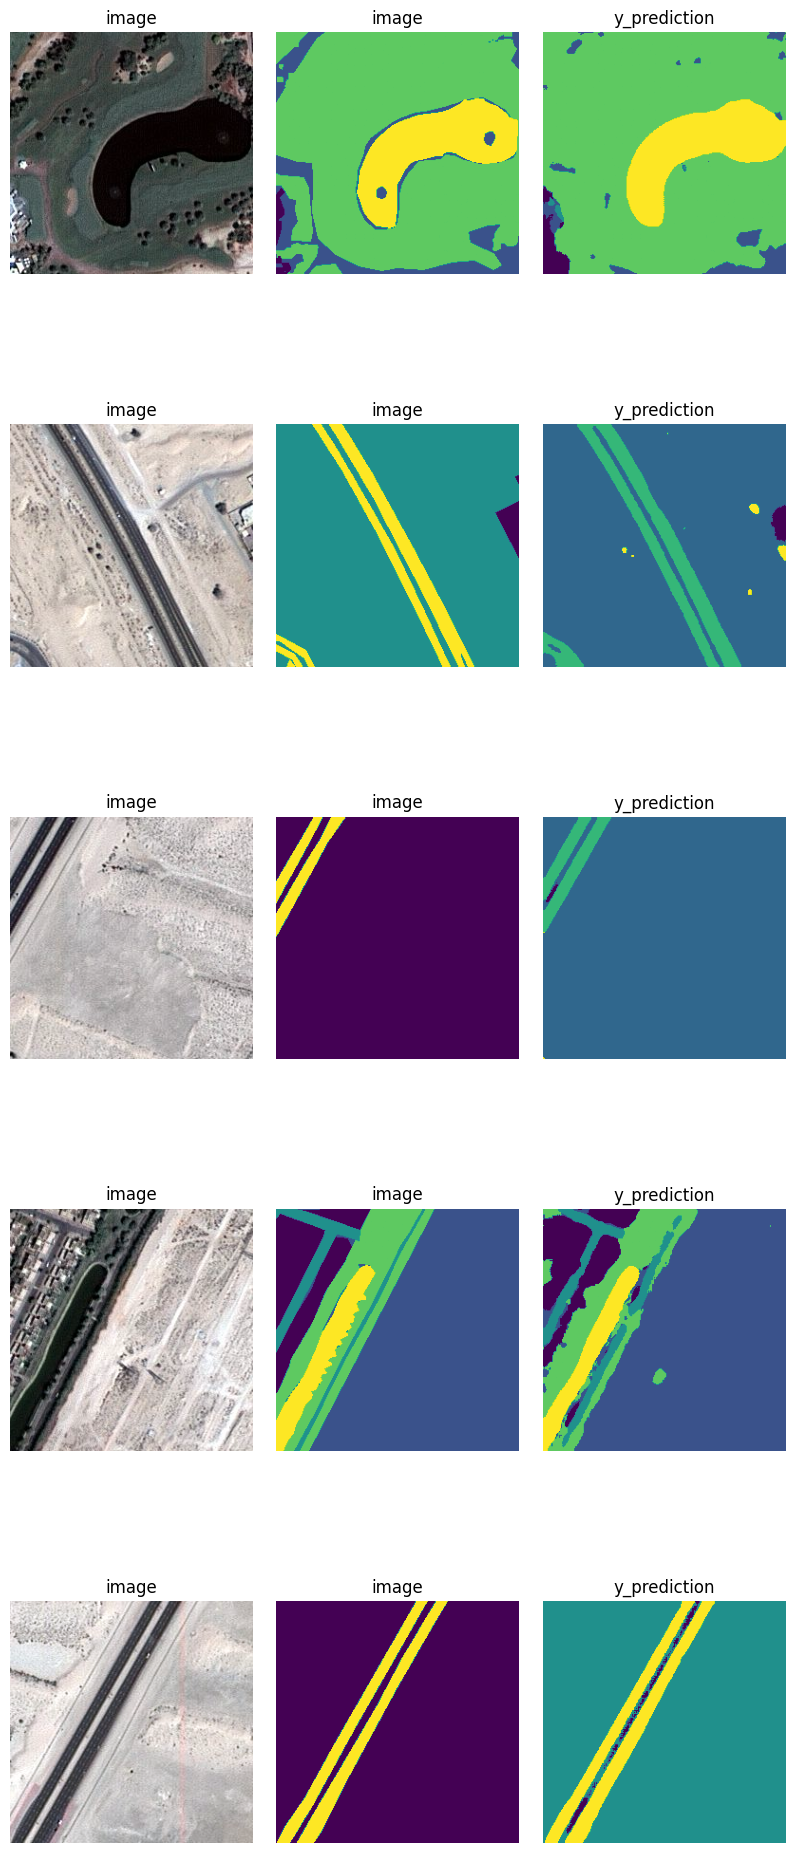

In [ ]:
num_examples = 5
fig, axes = plt.subplots(num_examples, 3, figsize=(10, 5 * num_examples))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

for i in range(num_examples):
    axes[i, 0].imshow(iou_above_5['image'].iloc[i])
    axes[i, 0].set_title('image')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(iou_above_5['y_true'].iloc[i])
    axes[i, 1].set_title('image')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(iou_above_5['y_pred'].iloc[i])
    axes[i, 2].set_title('y_prediction')
    axes[i, 2].axis('off')


- visualisasi 5 instance yang memiliki IoU yang rendah


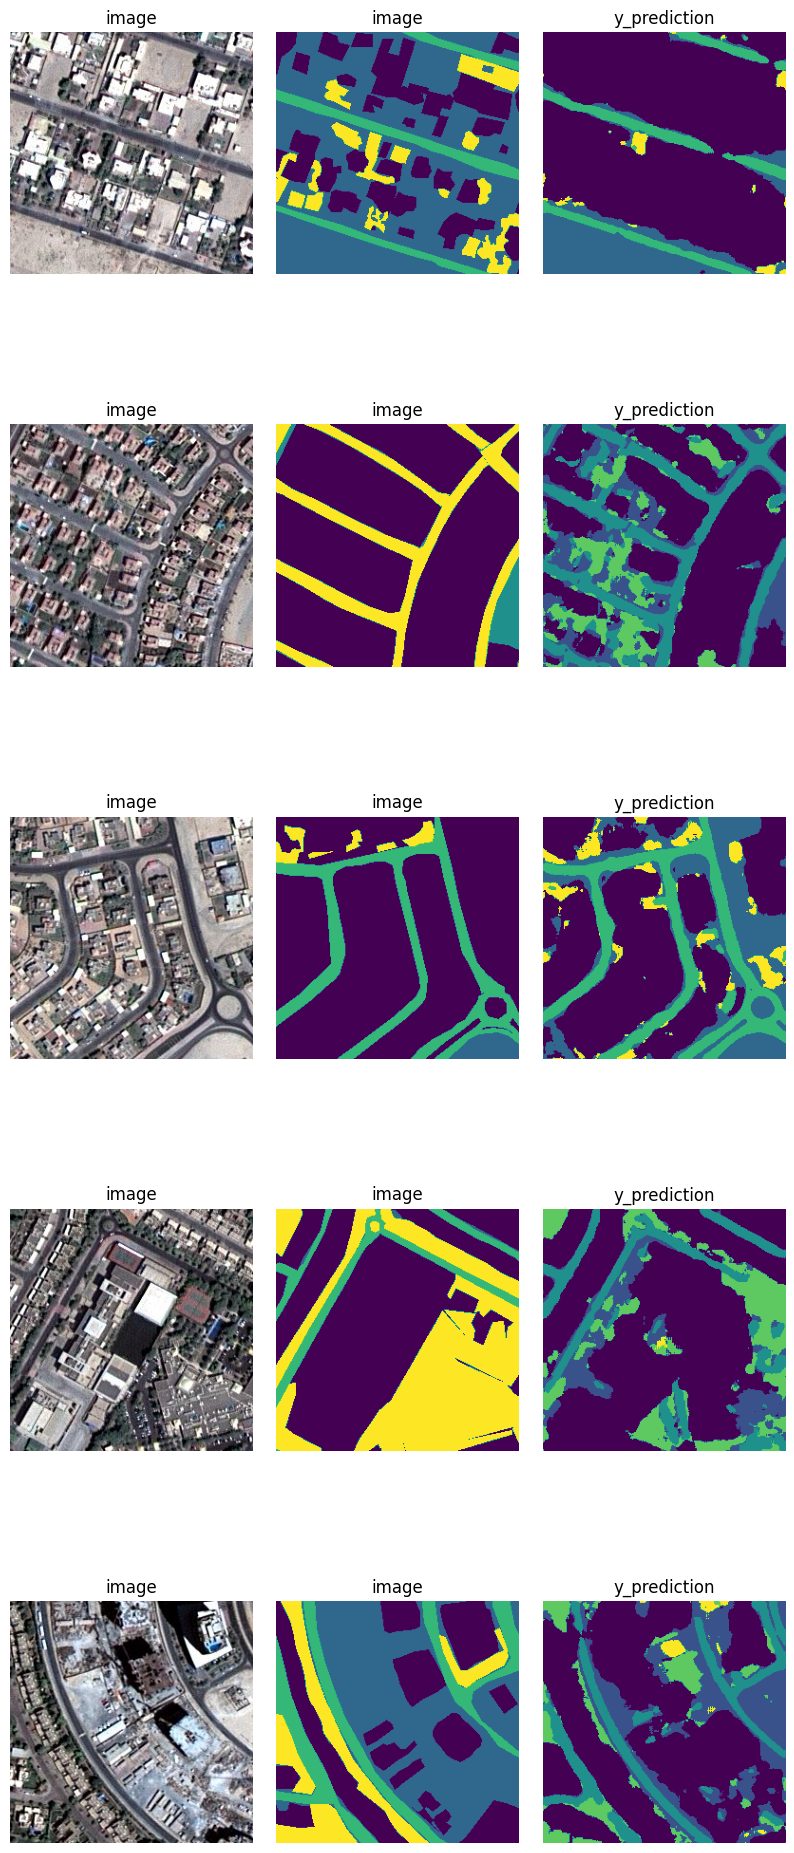

In [ ]:
num_examples = 5
fig, axes = plt.subplots(num_examples, 3, figsize=(10, 5 * num_examples))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

for i in range(num_examples):
    axes[i, 0].imshow(iou_bellow_5['image'].iloc[i])
    axes[i, 0].set_title('image')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(iou_bellow_5['y_true'].iloc[i])
    axes[i, 1].set_title('image')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(iou_bellow_5['y_pred'].iloc[i])
    axes[i, 2].set_title('y_prediction')
    axes[i, 2].axis('off')


**Kesimpulan:** 

Bedasarkan visual hasil prediksi sebelum dan sesudah hyperparameter, terlihat hasil prediksi yang sebelum lebih baik dibandingkan hasil setelah hyperparameter tuning, ini dapat dilihat dari hasil prediksi model sebelum dilakukan hyperparameter tuning memprediksi bagian-bagian bangunan dengan instance yang besar sehingga masih terlihat berbentuk bangunan, sedangkan hasil prediksi model setelah hyperparameter tuning memprediksi terlalu detail sehingga instance yang terbentuk tidak berbentuk bangunan. Dilihat dari angka IoU model sebelum dilakukan hyperparameter tuning juka lebih tinggi dibandingkan yang setelah. Sebelum hyperparameter tuning IoU 0.59 namun setelah hyperparameter tuning menjadi 0.55. Meskipun dari segi akurasi model lebih baik namun model hyperparameter tidak memprediksi lebih baik dibandingkan model sebelumnya.

### **7. Tuliskan insight apa saja yang kamu temukan dan berikan recommendation action**

Insight yang ditemukan dari segmentasi aerial satelit adalah bahwa model sudah mampu melakukan prediksi dengan baik, tetapi masih ada ruang untuk pengembangan lebih lanjut. Diperlukan tambahan data yang mencakup kondisi yang bervariasi agar model dapat melakukan prediksi di berbagai jenis aerial yang baru. Selain itu, penambahan geometry pada data training akan memungkinkan analisis spasial yang lebih mendalam.

recommendation action yang dapat dilakukan untuk pengembangan model

- Pengumpulan Data yang Lebih Komprehensif: Perlu dilakukan pengumpulan data yang lebih lengkap dan beragam untuk mencakup berbagai kondisi dan jenis aerial.

- Peningkatan Model dengan Data Tambahan: Model perlu diperbarui dengan data tambahan yang mencerminkan variasi kondisi yang ada di lapangan. Ini akan membantu model untuk lebih akurat dalam melakukan prediksi pada berbagai jenis aerial.

- Penambahan Informasi Geometri: Integrasi informasi geometri pada data training akan memungkinkan analisis spasial yang lebih baik. Hal ini dapat membantu dalam memahami hubungan spasial antara objek di permukaan bumi, yang pada gilirannya dapat meningkatkan kualitas prediksi.

**Penerapan dalam dunia nyata:**

Segmentasi aerial satelit memiliki potensi besar untuk diterapkan dalam berbagai industri seperti pertanian presisi, pemantauan lingkungan, pemetaan urban, manajemen sumber daya alam, dan survei perencanaan kota. Dengan meningkatnya permintaan akan informasi spasial yang akurat, penggunaan teknologi segmentasi aerial satelit dapat memberikan kontribusi yang signifikan dalam memecahkan masalah dunia nyata di berbagai sektor.


### **8. Lakukan Deployment terkait model terbaik yang telah didapatkan**
private repository: code buat ipynb, API service, CI/CD github actions
